The aim of this project is to predict weather the customer is willing to take the loan while retaing them as depositors./

In [71]:

import numpy as np
import pandas as pd  
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn import metrics
%matplotlib inline 

In [72]:
bankDF=pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')
bankDF.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [73]:
bankDF.head()
bankDF.isnull().any()
bankDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


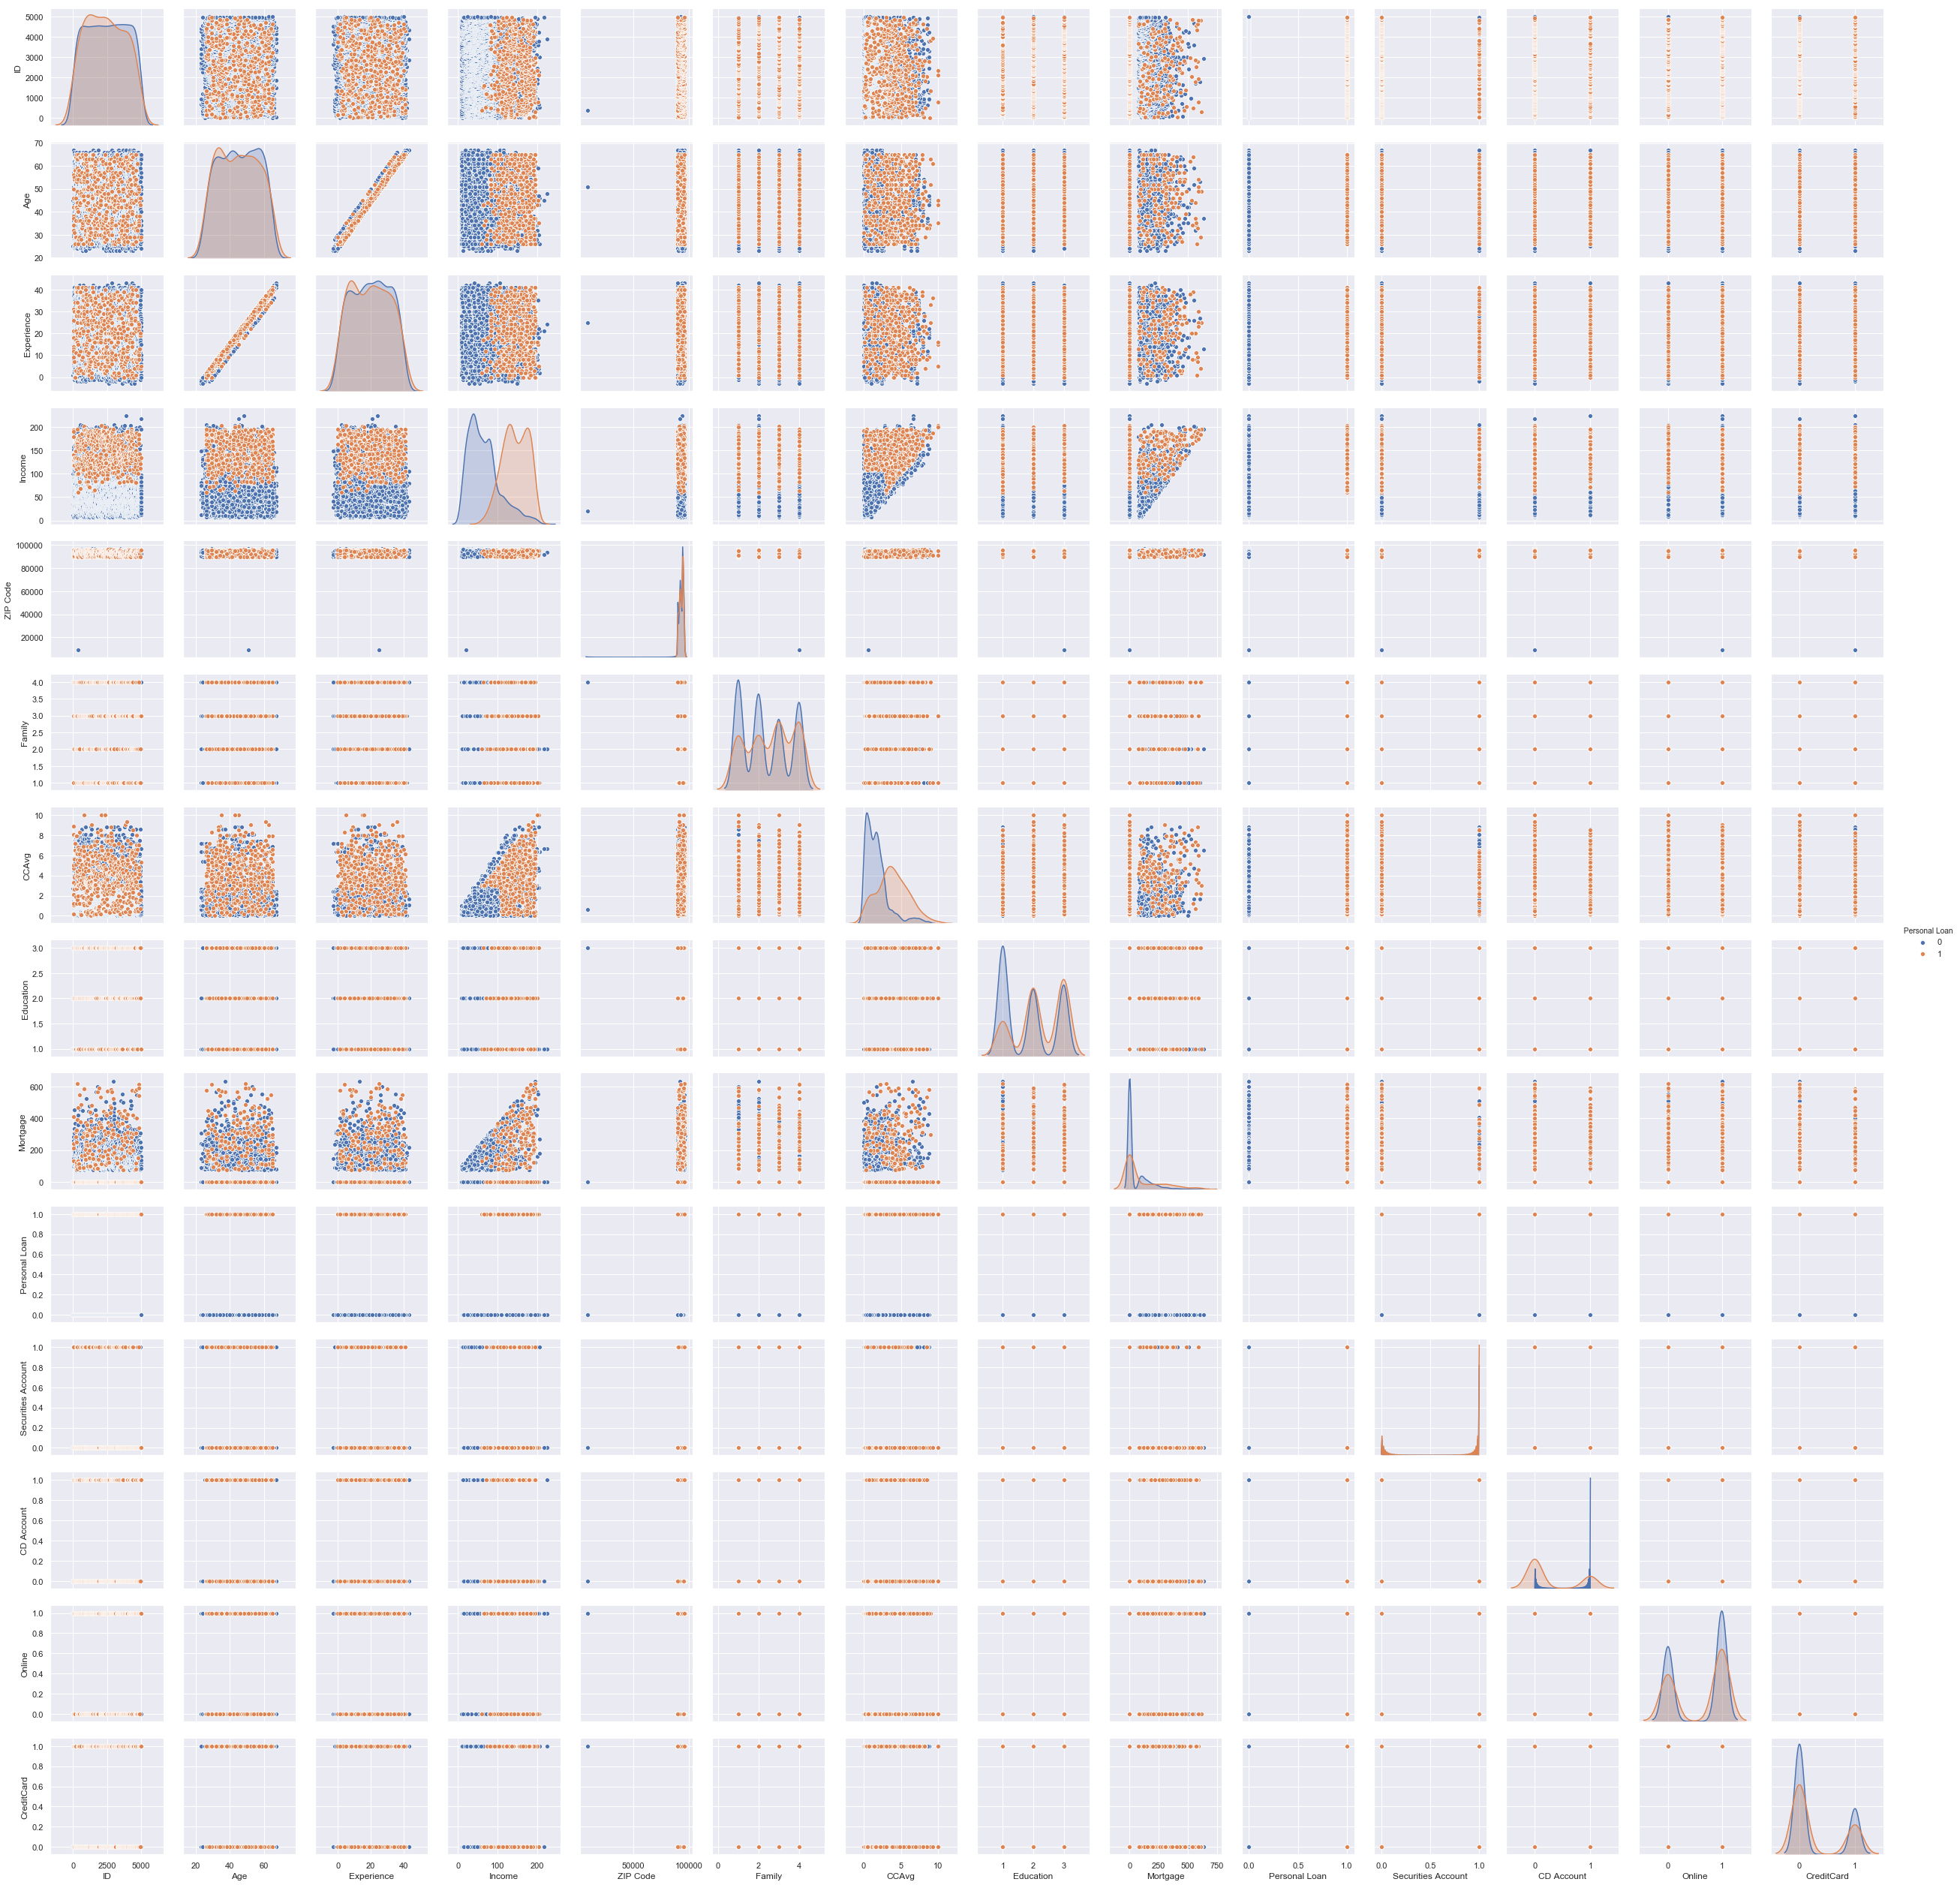

In [74]:
# sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.pairplot(bankDF,hue='Personal Loan')

In [75]:
bankDF.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


### since we have negative experience which is impossible ,we will make it 0 .

In [106]:
bankDF[bankDF['Experience']<0]=0
bankDF.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2475.255600,1458.007058,0.0,1215.75,2471.5,3737.25,5000.0
Age,5000.0,45.083400,12.173351,0.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.119600,11.440484,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.046800,46.479457,0.0,38.00,63.0,98.00,224.0
ZIP Code,5000.0,92182.797000,9684.939581,0.0,91775.00,93407.0,94608.00,96651.0
Family,5000.0,2.366600,1.167937,0.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.915792,1.749641,0.0,0.67,1.5,2.50,10.0
Education,5000.0,1.859400,0.856842,0.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.045400,101.460724,0.0,0.00,0.0,100.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


## Attributes Observations

In [107]:
bankDF.groupby(["Personal Loan"]).count()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


### Age:
#### Age is right skewed , that maybe because the person with age zero is impossible and outlier which is displayed in box plot
#### There are people only between the age of 20 and 60
#### and box plot for personal loan (0 and 1) are same  q1,median and q3 which suggest that the highly scattered and not a good feature. 

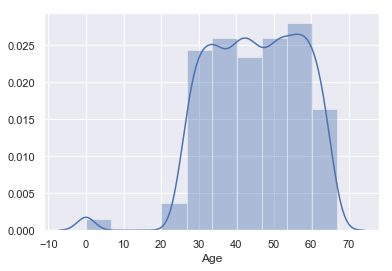

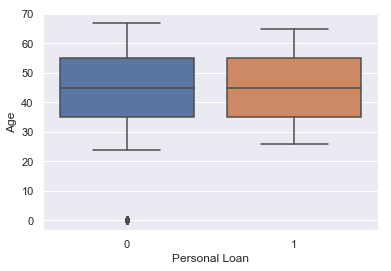

In [115]:

sns.distplot(bankDF['Age'],kde=True,bins=10)
plt.show()
sns.boxplot(y='Age',x='Personal Loan',data=bankDF)
plt.show()

### Experience : Normally distributed

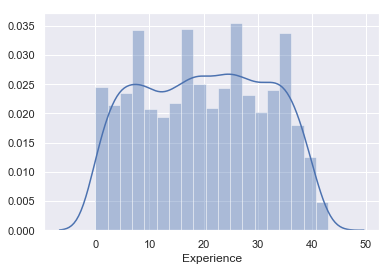

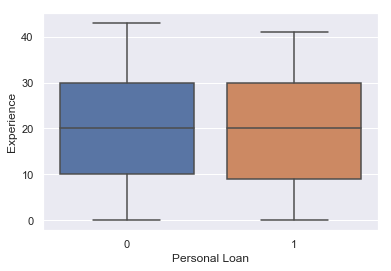

In [117]:
sns.distplot(bankDF['Experience'],kde=True)
plt.show()
sns.boxplot(y='Experience',x='Personal Loan',data=bankDF)
plt.show()

 ### Income : Left Skewed
 #### we have high outliers for high income who didnt take loan  
 #### but people with income more than 125 high no of people  to take loan  even though they have outliers for not taking loan,as represented in the box plot

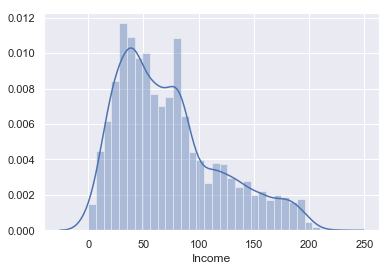

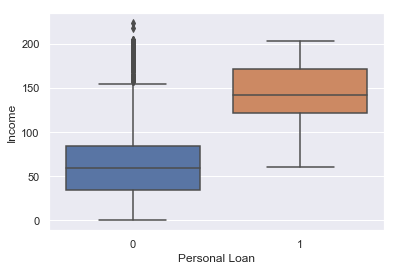

In [119]:
sns.distplot(bankDF['Income'],kde=True)
plt.show()
sns.boxplot(y='Income',x='Personal Loan',data=bankDF)
plt.show()

### Family:
#### family with size more than 3 are more likly to take loan as suggested by boxplot.

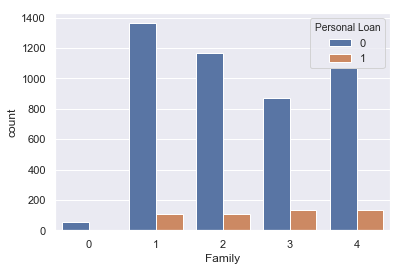

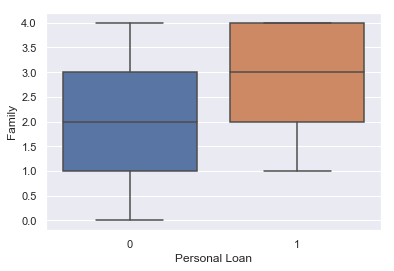

In [130]:

sns.countplot(x='Family',hue='Personal Loan', data=bankDF)
plt.show()
sns.boxplot(y='Family',x='Personal Loan',data=bankDF)
plt.show()

### Education: 
#### the people with graduate and advanced education have higher ratio who have taken loan

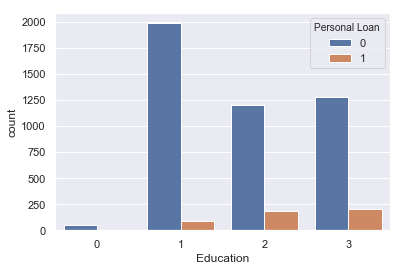

In [123]:
sns.countplot(x='Education',hue='Personal Loan', data=bankDF)
plt.show()


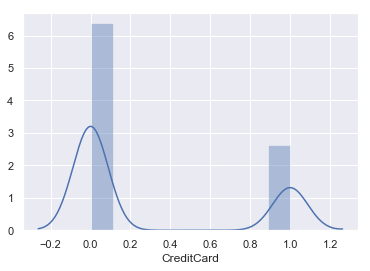

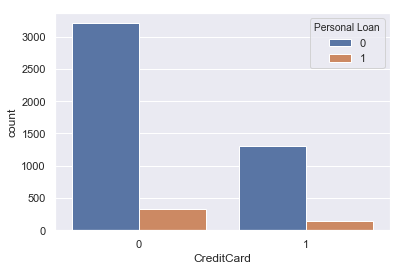

In [138]:
sns.distplot(bankDF['CreditCard'],kde=True)
plt.show()
sns.countplot(x='CreditCard',hue='Personal Loan', data=bankDF)
plt.show()


### Mortgage:
#### highly left skewed as very less people have kept mortgage which is a form of loan.
#### but people who have taken , its above 90.

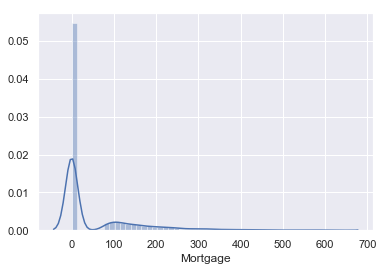

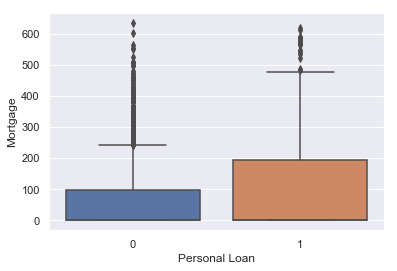

In [134]:
sns.distplot(bankDF['Mortgage'],kde=True)
plt.show()
sns.boxplot(y='Mortgage',x='Personal Loan',data=bankDF)
plt.show()

### CCAvg:
#### Left skewed
#### Most People with CCAvg 9 have taken loan with no one not have taken loan

sns.distplot(bankDF['CCAvg'],kde=False)
plt.show()

sns.boxplot(y='CCAvg',x='Personal Loan',data=bankDF)
plt.show()

sns.pairplot(bankDF[['CCAvg','CreditCard','Personal Loan']],hue='Personal Loan')
plt.show()

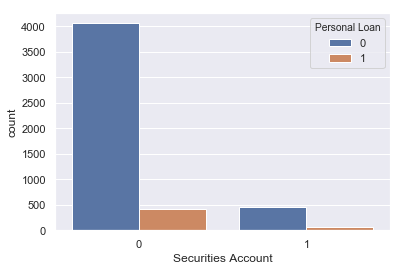

In [112]:
sns.countplot(x='Securities Account',hue='Personal Loan', data=bankDF)
plt.show()



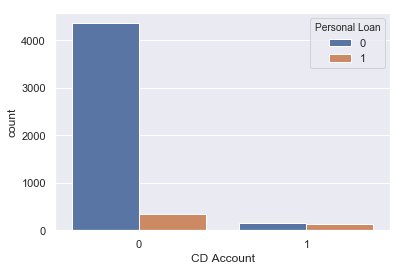

In [84]:
sns.countplot(x='CD Account',hue='Personal Loan', data=bankDF)
plt.show()

### Target Column: Personal Loan
#### There are more data with non loan, and every less data for loan taking people  

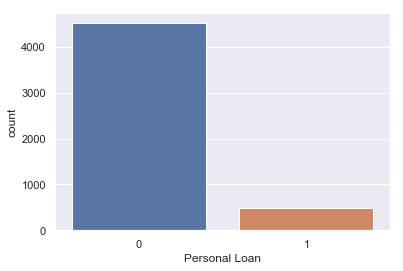

In [169]:
sns.countplot(x='Personal Loan', data=bankDF)
plt.show()

#### Since we dont need ID and ZipCode column we will drop them

In [176]:
bankDF_Copy=bankDF.copy()
bankDF_Copy=bankDF_Copy.drop(['ID','ZIP Code'],axis=1)
bankDF_Copy.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [182]:
Y=bankDF_Copy['Personal Loan'] # Target Data
X=bankDF_Copy.drop(['Personal Loan'],axis=1) # Attributes

In [203]:
test_size = 0.30 # taking 70:30 training and test set
seed = 1  # Random numbmer seeding for reapeatability of the code

X_train,X_test,y_train,y_test=train_test_split(X, Y, test_size=test_size, random_state=seed)

print('X_train',X_train.shape,'X_test',X_test.shape)

X_train (3500, 11) X_test (1500, 11)


### Logistic Regresion

In [204]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression


### Before Scaling

In [205]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)

0.9466666666666667


### After Scaling

In [237]:
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)
Logistic_expected=y_test

In [240]:
model_scale = LogisticRegression()
model_scale.fit(X_train_scaled, y_train)
Logistic_predicted = model_scale.predict(X_test_scaled)
model_scale_score = model_scale.score(X_test_scaled, y_test)
print(model_scale_score)

0.948


#### We dont see much deffrence

### K-NN 

In [208]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import StandardScaler  
import warnings
warnings.filterwarnings('ignore')

In [210]:
nbrs = np.arange(1, 11)
print(nbrs)
train_accuracy_plot = np.empty(len(nbrs))
test_accuracy_plot = np.empty(len(nbrs))
# Loop over different values of k
for i, k in enumerate(nbrs):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=1)
    sc=StandardScaler()
    scaledX_train = sc.fit_transform(X_train)
    scaledX_test = sc.transform(X_test)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaledX_train,y_train)
    #Compute accuracy on the training set
    train_accuracy_plot[i] = knn.score(scaledX_train,y_train)
    
    #Compute accuracy on the testing set
    test_accuracy_plot[i] = knn.score(scaledX_test,y_test)

print('Peak Test value is: ', test_accuracy_plot.max())
OpK = np.where(test_accuracy_plot == test_accuracy_plot.max())
print('Optimal value of K is: ', nbrs[OpK[0][0]])    


[ 1  2  3  4  5  6  7  8  9 10]
Peak Test value is:  0.9546666666666667
Optimal value of K is:  3


### Naive bayes

In [211]:
from sklearn.naive_bayes import GaussianNB

In [221]:
model = GaussianNB()
model.fit(X_train, y_train)
# make predictions
expected = y_test
predicted = model.predict(X_test)
model_Naive_score = model.score(X_test, y_test)
print('Score:',model_Naive_score)



Score: 0.8766666666666667


### Confusion Matrixs

#### Naive Bayes CF:

In [225]:
# summarize the fit of the model
print('Naive Bayes CF:\n',metrics.confusion_matrix(expected, predicted),'\n\n')
print(metrics.classification_report(expected, predicted))

Naive Bayes CF:
 [[1230  121]
 [  64   85]] 


              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1351
           1       0.41      0.57      0.48       149

   micro avg       0.88      0.88      0.88      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.90      0.88      0.89      1500



#### K-NN CF:

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=1)
sc=StandardScaler()
scaledX_train = sc.fit_transform(X_train)
scaledX_test = sc.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(scaledX_train,y_train)
knn_expected=y_test
knn_predicted=knn.predict(scaledX_test)
#Compute accuracy on the training set

train_accuracy_plot_3 = knn.score(scaledX_train,y_train)
#Compute accuracy on the testing set

test_accuracy_plot_3 = knn.score(scaledX_test,y_test)

print(test_accuracy_plot_3)

0.9546666666666667


In [235]:
# summarize the fit of the model
print('K-NN CF:\n',metrics.confusion_matrix(knn_expected, knn_predicted),'\n\n')
print(metrics.classification_report(knn_expected, knn_predicted))

K-NN CF:
 [[1341   10]
 [  58   91]] 


              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1351
           1       0.90      0.61      0.73       149

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.93      0.80      0.85      1500
weighted avg       0.95      0.95      0.95      1500



#### Logistic regression CF:

In [241]:
# summarize the fit of the model
print('Logistic Regression CF:\n',metrics.confusion_matrix(Logistic_expected, Logistic_predicted),'\n\n')
print(metrics.classification_report(Logistic_expected, Logistic_predicted))

Logistic Regression CF:
 [[1334   17]
 [  61   88]] 


              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1351
           1       0.84      0.59      0.69       149

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.90      0.79      0.83      1500
weighted avg       0.94      0.95      0.94      1500



### The K-NN performed better than Naive Bayes and Logistic Regrission as it has better accuracy of 95.46 %.And when we compare the confusion matrix we see that k-NN predicted 91 correctly out of 99 test records, recall of 0.59 and precision of 0.84 which is higher than other two algo.

### K-NN performans better than other two because
#### 1. It is less computationally intensive 
#### 2. It looks for nearnest Neighbor for k=3
#### 3. Logistic regression classifies based on inverse log probalility where if p>=50% it assignes to 1 and if less to 0 which will have high log loss function.
#### But K-NN is only slightly better than Logistic Regression

#### So the error rate of all 3 is given below which is 1-accuracy.

#### Naive Bayes: (1-0.8766666666666667)=0.1233333333333333
#### Logistic Regression  (after scaling): (1-0.948)=0.052
#### K-NN (k=3):(1-0.9546666666666667)=0.0453333333333333